<a href="https://colab.research.google.com/github/BLITBLAZERS/PHISHGUARDIAN/blob/main/WebPage_Image_Anaylsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEB PAGE IMAGE ANALYSIS
WEBPAGE IMAGE ANALYSIS TO DETERMINE PROBABILITY SCORE OF PHISHING WEBSITES TO LEGITIMSTE WEBSITES.

## **A) EXTRACTION OF IMAGES FROM WEBSITE URLS IN DATASET : **
### 1. Web Scraping:

Choose a web scraping or crawling framework/library in a programming language of your choice.

### 2. Define Target URLs:

Create a list of phishing and legitimate URLs you want to collect images from.

### 3. Visit Each URL:

Use your chosen framework to visit each URL in your list.

### 4. Render Webpages:

render the webpages to ensure that JavaScript-generated content, including images, is loaded.

### 5. Locate and Collect Images:

Inspect the HTML of the webpages to identify image elements

### 6. Download Images:

we will extract and collect images from both legitimate and phishing websites and store these images in their respective directories .

In [54]:
import requests
from bs4 import BeautifulSoup
import os
import cv2

# Define the URL to scrape
url = "https://example.com"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.content, "html.parser")

    # Find all image tags
    img_tags = soup.find_all("img")

    # Create a directory to store the images
    os.makedirs("images", exist_ok=True)

    # Download and save each image
    for img_tag in img_tags:
        img_url = img_tag.get("src")
        if img_url:
            img_data = requests.get(img_url).content
            with open(f"images/{os.path.basename(img_url)}", "wb") as img_file:
                img_file.write(img_data)
else:
    print("Failed to retrieve the webpage.")

# You can repeat this process for multiple URLs and both phishing and legitimate websites.


## **B) PREPROCESSING IMAGES **

Preprocessing images for analysis, such as resizing, normalization, and color conversion, is an important step to ensure consistency and prepare the images for further processing.

**1. Resize Images:**

In [66]:
import cv2

# Load an image (replace 'image_path' with the actual file path)
image = cv2.imread('/content/Screenshot 2023-09-21 022817.png')
image2 = cv2.imread('/content/Screenshot 2023-09-21 022820.png')


# Resize the image to a specific size (e.g., 128x128 pixels)
resized_image = cv2.resize(image, (128, 128))
resized_image2 = cv2.resize(image2, (128, 128))


**2. Normalize Images:**

In [56]:
# Normalize the image pixel values to the range [0, 1]
normalized_image = resized_image / 255.0


**3.  Convert to Grayscale**

In [57]:
# Convert the image to grayscale
grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)


**4. Convert to RGB **

In [58]:
# Convert the grayscale image to RGB format

rgb_image = cv2.cvtColor(grayscale_image, cv2.COLOR_GRAY2RGB)


**5.Save Preprocessed Images**

In [59]:
import cv2
cv2.imwrite('output_image.png',rgb_image)


True

## **C) FEATURE EXTRACTION **

Feature extraction is a crucial step in image analysis and classification. You can extract various types of features from images, including color histograms, texture features, and shape characteristics. Additionally, deep learning techniques like Convolutional Neural Networks (CNNs) can automatically learn and extract relevant features from images.

**1) HISTOGRAMS**



**RGB COLOR HISTOGRAM : **

A histogram that quantifies the distribution of red, green, and blue pixel intensities in the image. It helps identify dominant colors.


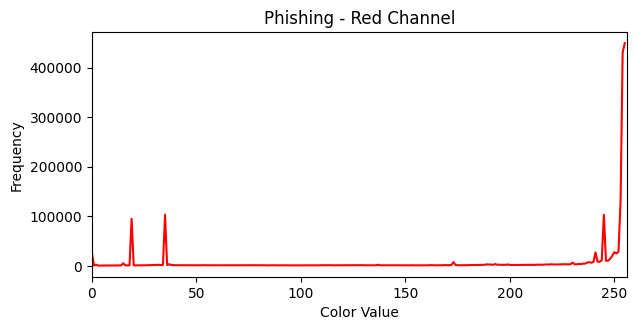

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to compute RGB color histogram
def compute_rgb_histogram(image_path):
    # Load an image
    image = cv2.imread(image_path)

    # Convert the image to RGB color space (if it's not already)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate the RGB color histogram
    hist_r = cv2.calcHist([image_rgb], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([image_rgb], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([image_rgb], [2], None, [256], [0, 256])

    return hist_r, hist_g, hist_b

# Sample image paths (replace with actual image paths)
phishing_image_path = '/content/Screenshot 2023-09-21 022820.png'
legitimate_image_path = '/content/Screenshot 2023-09-21 022820.png'

# Compute RGB histograms for phishing and legitimate websites
phishing_hist_r, phishing_hist_g, phishing_hist_b = compute_rgb_histogram(phishing_image_path)
legitimate_hist_r, legitimate_hist_g, legitimate_hist_b = compute_rgb_histogram(legitimate_image_path)

# Plot RGB histograms for phishing and legitimate websites
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.title("Phishing - Red Channel")
plt.xlabel("Color Value")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.plot(phishing_hist_r, color='red')
# repeat the same for green and blue channel and again for legitimate images.
plt.tight_layout()
plt.show()


**HSV Color Histogram:**

 Histograms based on Hue, Saturation, and Value components, which are more robust to changes in lighting conditions.


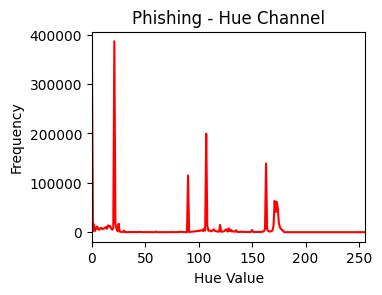

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to compute HSV color histogram
def compute_hsv_histogram(image_path):
    # Load an image
    image = cv2.imread(image_path)

    # Convert the image to HSV color space
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Calculate the HSV color histogram
    hist_hue = cv2.calcHist([image_hsv], [0], None, [256], [0, 256])
    hist_saturation = cv2.calcHist([image_hsv], [1], None, [256], [0, 256])
    hist_value = cv2.calcHist([image_hsv], [2], None, [256], [0, 256])

    return hist_hue, hist_saturation, hist_value

# Sample image paths (replace with actual image paths)
phishing_image_path = '/content/Screenshot 2023-09-21 022820.png'
legitimate_image_path = '/content/Screenshot 2023-09-21 022820.png'

# Compute HSV histograms for phishing and legitimate websites
phishing_hist_hue, phishing_hist_saturation, phishing_hist_value = compute_hsv_histogram(phishing_image_path)
legitimate_hist_hue, legitimate_hist_saturation, legitimate_hist_value = compute_hsv_histogram(legitimate_image_path)

# Plot HSV histograms for phishing and legitimate websites
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.title("Phishing - Hue Channel")
plt.xlabel("Hue Value")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.plot(phishing_hist_hue, color='red')

# Repeat the same for saturation channel


**2) TEXTURE ANALYSIS**

**LOCAL BINARY PATTERNS (LBP)**

Local Binary Patterns (LBP) is a texture analysis method used in computer vision and image processing to describe local patterns or textures within an image. LBP is particularly useful for tasks such as texture classification and object recognition

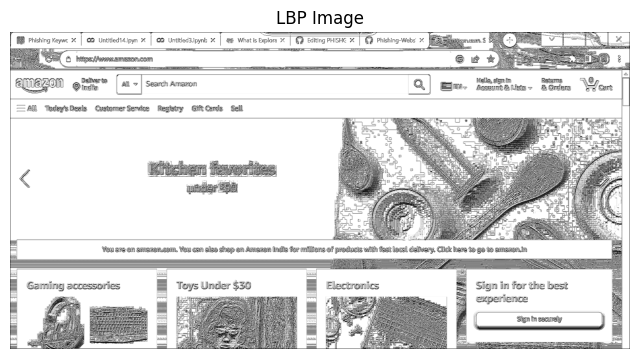

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to compute LBP for a single pixel
def compute_lbp_pixel(center, pixels):
    binary_values = []
    for pixel in pixels:
        binary_values.append(1 if pixel >= center else 0)
    return int(''.join(map(str, binary_values)), 2)

# Function to compute LBP for an entire image
def compute_lbp(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp_image = np.zeros_like(gray)

    height, width = gray.shape
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center = gray[i, j]
            pixels = [gray[i - 1, j - 1], gray[i - 1, j], gray[i - 1, j + 1], gray[i, j + 1],
                      gray[i + 1, j + 1], gray[i + 1, j], gray[i + 1, j - 1], gray[i, j - 1]]

            lbp_value = compute_lbp_pixel(center, pixels)
            lbp_image[i, j] = lbp_value

    return lbp_image

# Load an image
image_path = '/content/Screenshot 2023-09-21 022820.png'  # Replace with the path to your grayscale image
image = cv2.imread(image_path)

# Compute LBP for the image
lbp_image = compute_lbp(image)

# Display the LBP image using matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(lbp_image, cmap='gray')
plt.title('LBP Image')
plt.axis('off')  # Hide axis
plt.show()


**GRAY-LEVEL CO-OCCURENCE MATRIX (GLCM)**

It is a statistical method used in image processing and texture analysis to quantify the spatial relationship between pixels in a grayscale image.

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')


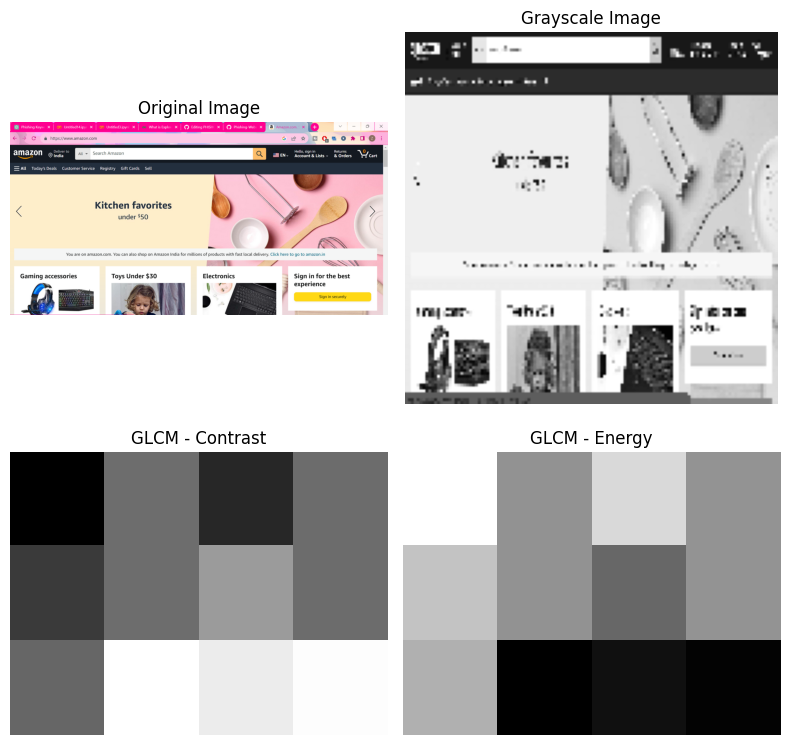

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
from skimage import io, color

# Load an image
image_path = '/content/Screenshot 2023-09-21 022820.png'  # Replace with the path to your image
image = io.imread(image_path)



# Define the distances and angles for GLCM computation
distances = [1, 2, 3]  # You can modify these distances
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # You can modify these angles

# Compute the GLCM
glcm = greycomatrix(grayscale_image, distances=distances, angles=angles, symmetric=True, normed=True)

# Calculate GLCM properties (e.g., contrast, energy, correlation)
contrast = greycoprops(glcm, 'contrast')
energy = greycoprops(glcm, 'energy')
correlation = greycoprops(glcm, 'correlation')

# Display the original image
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display the grayscale image
plt.subplot(2, 2, 2)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Display GLCM properties
plt.subplot(2, 2, 3)
plt.imshow(contrast, cmap='gray')
plt.title('GLCM - Contrast')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(energy, cmap='gray')
plt.title('GLCM - Energy')
plt.axis('off')

plt.tight_layout()
plt.show()


**CNN FEATURES**

Convolutional Neural Networks (CNNs) can be used to learn image features from phishing webpage screenshots in order to detect phishing websites. Here's how you can approach using CNNs for this task:

1. **Data Collection**: Collect a dataset of screenshots or images of both legitimate and phishing webpages. Make sure that the images are labeled correctly, indicating whether each image corresponds to a legitimate or phishing webpage.

2. **Data Preprocessing**:
   - Resize the images to a consistent size (e.g., 224x224 pixels) to ensure uniformity.
   - Normalize pixel values to the range [0, 1].
   - Split the dataset into training, validation, and test sets.

3. **CNN Architecture**:
   - Define a CNN architecture suitable for image classification. You can use popular pre-trained architectures like VGG, ResNet, or Inception, or design a custom architecture.
   - Replace the output layer of the pre-trained model with a new output layer that has a single neuron for binary classification (legitimate vs. phishing).

4. **Transfer Learning**:
   - Initialize the CNN model with pre-trained weights (e.g., ImageNet) to leverage pre-learned image features.
   - Fine-tune the model on your dataset by retraining the final layers or specific layers while keeping the early layers (feature extractors) fixed.

5. **Training**:
   - Train the CNN model on your dataset using the training and validation sets.
   - Use binary cross-entropy loss as the loss function.

6. **Evaluation**:
   - Evaluate the model's performance on the test set to assess its accuracy, precision, recall, F1-score, and other relevant metrics.
   - Visualize the model's predictions and confusion matrix to understand its behavior.

7. **Data Augmentation**:
   - Apply data augmentation techniques to artificially increase the size of your dataset. Common augmentations include rotation, flipping, and cropping. This helps the model generalize better.

8. **Regularization**:
   - Use techniques like dropout and L2 regularization to prevent overfitting.

9. **Hyperparameter Tuning**:
   - Experiment with different hyperparameters, such as learning rate, batch size, and model architecture, to optimize the model's performance.

10. **Inference**:
    - Deploy the trained model to make predictions on new, unseen webpage screenshots.
    - You can use the model to score URLs based on the probability of being phishing.

11. **Continuous Monitoring**:
    - Phishing websites evolve, so it's essential to continuously collect new screenshots and retrain the model to adapt to new threats.

By using CNNs for image feature extraction and classification, you can automate the detection of phishing webpages based on their visual content. The model will learn to capture patterns and features that distinguish between legitimate and phishing webpages, making it a valuable tool for cybersecurity.



EXAMPLE CODE FOR CNN MODELLING

170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/10
1563/1563 [==============================] - 71s 44ms/step - loss: 1.5143 - accuracy: 0.4472 - val_loss: 1.2000 - val_accuracy: 0.5708
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1383 - accuracy: 0.5988 - val_loss: 1.1077 - val_accuracy: 0.6080
Epoch 3/10
1563/1563 [==============================] - 70s 44ms/step - loss: 0.9939 - accuracy: 0.6522 - val_loss: 0.9634 - val_accuracy: 0.6616
Epoch 4/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.8935 - accuracy: 0.6884 - val_loss: 0.9114 - val_accuracy: 0.6813
Epoch 5/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.8187 - accuracy: 0.7119 - val_loss: 0.8995 - val_accuracy: 0.6923
Epoch 6/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7592 - accuracy: 0.7366 - val_loss: 0.8695 - val_accuracy: 0.7015
Epoch 7/10
1563/1563 [==============================] - 6

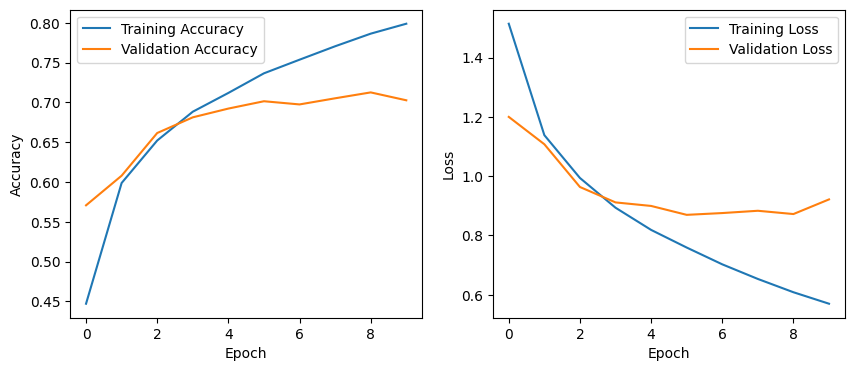

In [47]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## **D) IMAGE SIMILARITYB ANALYSIS**


Using image similarity metrics is a valuable technique to compare phishing images with legitimate ones and determine their visual similarity.
After calculating the similarity metrics, you can set a threshold value to classify images as visually similar or dissimilar.
###** Mean Squared Error (MSE)**:

Calculate the MSE between two images, where lower MSE indicates higher similarity.
You can compute the MSE using libraries like OpenCV or scikit-image.

### **Structural Similarity Index (SSIM)**:

SSIM is a widely used metric for measuring the structural similarity between images. It considers luminance, contrast, and structure.
Higher SSIM values indicate greater similarity.

In [67]:
from skimage import io, metrics

# Load two images (phishing and legitimate)

# Calculate MSE
mse = metrics.mean_squared_error(resized_image, resized_image2)

# Calculate SSIM
ssim = metrics.structural_similarity(resized_image, resized_image2, multichannel=True)

print(f'MSE: {mse}')
print(f'SSIM: {ssim}')


MSE: 10393.496765136719
SSIM: 0.14937174639283896


<ipython-input-67-4cd7e3a9f13f>:9: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim = metrics.structural_similarity(resized_image, resized_image2, multichannel=True)


In [68]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
